In [ ]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [ ]:
#importing modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [ ]:
#importing the file
from google.colab import files
data_to_load = files.upload()

Saving WA_Fn_UseC_Telco-Customer-Churn.csv to WA_Fn_UseC_Telco-Customer-Churn.csv


In [ ]:
#renaming the file and reading it
import io
df = pd.read_csv(io.BytesIO(data_to_load['WA_Fn_UseC_Telco-Customer-Churn.csv']))

**Data Analysis**

In [ ]:
#checking the features of the dataset as well as the top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking the bottom 5 rows of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [ ]:
#checking the number of rows and columns of the dataset
df.shape

(7043, 21)

In [ ]:
#checking the type of data under each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#converting datatype under 'TotalCharges' from object to float64 . errors = 'coerce' will avoid non-numeric data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#checking whether data under 'TotalCharges' is converted from object to float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking if there are any null values in the rows
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#dropping the null values and checking if the records with null values is dropped
df = df.dropna()
df.shape

(7032, 21)

In [ ]:
#dropping the feature 'customerID' which is non-relevant for further calculations.
df.drop(['customerID'],inplace = True,axis = 1)

In [ ]:
#checking if the feature 'customerID' is dropped
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#finding the statistical parameters of the features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#transposing the same data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


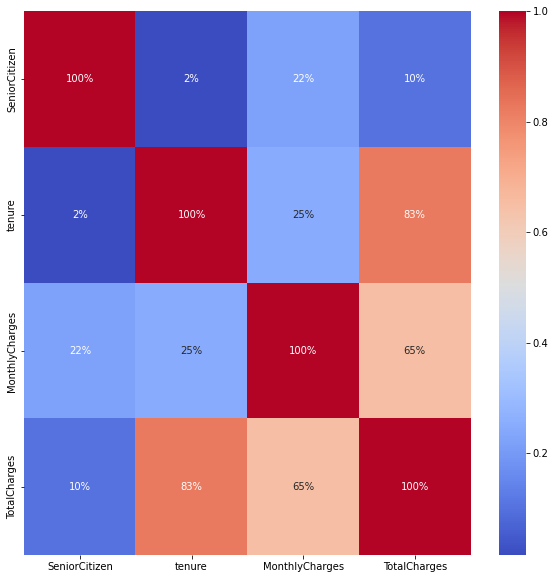

In [ ]:
#creating a heatmap to see the correlation between the various features
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

**Conclusion : We can find that tenure and TotalCharges is highly correlated (83%) followed by MonthlyCharges and TotalCharges(65%)**

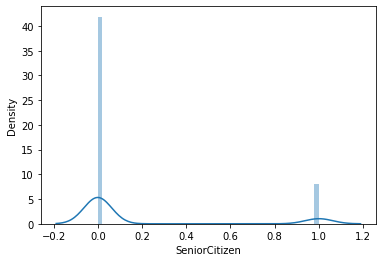

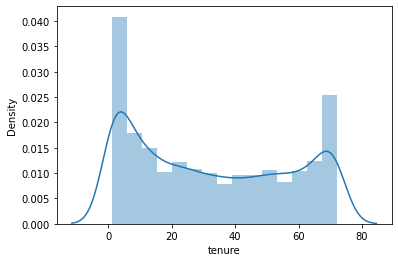

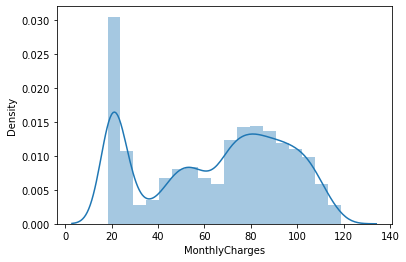

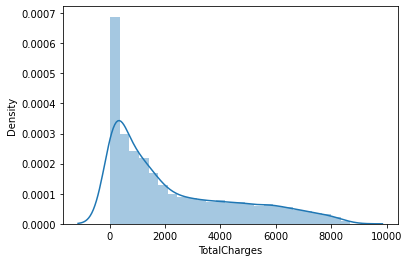

In [ ]:
#checking for the distibution of data under each feature in terms of skewness etc. using distribution plot             
sns.distplot(df.SeniorCitizen)
plt.show()

sns.distplot(df.tenure)
plt.show()

sns.distplot(df.MonthlyCharges)
plt.show()

sns.distplot(df.TotalCharges)
plt.show()

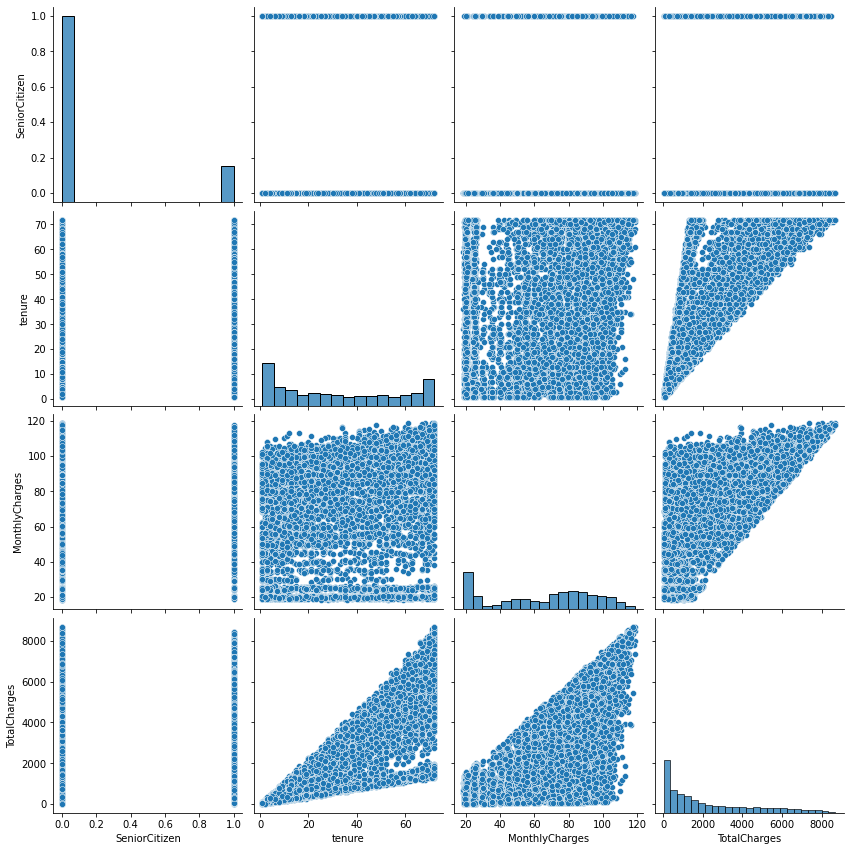

In [ ]:
# checking the bivariate relation between each pair of feature using pairplot
sns.pairplot(df,size=3)

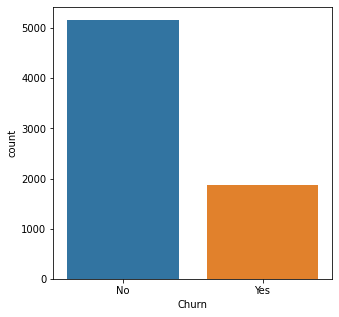

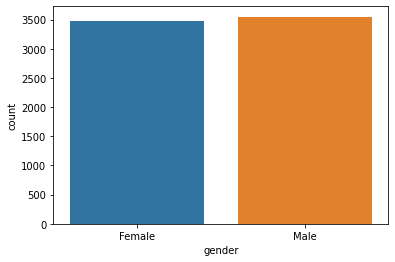

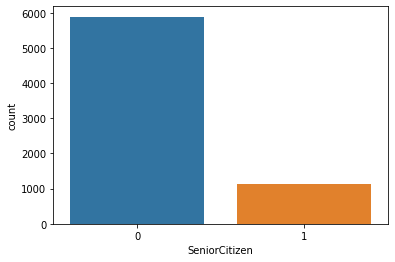

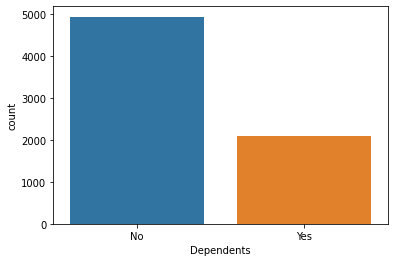

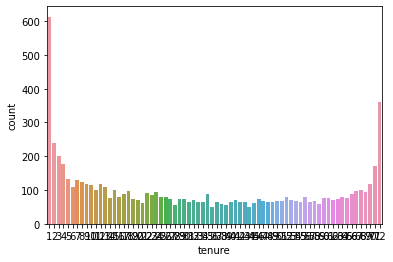

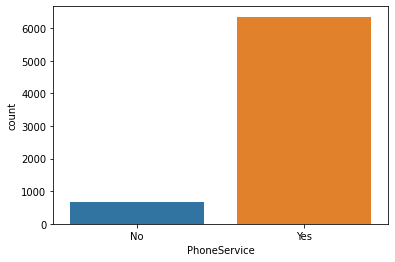

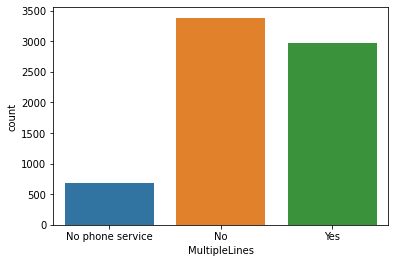

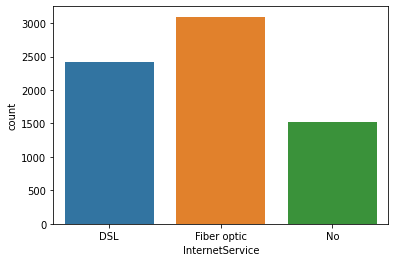

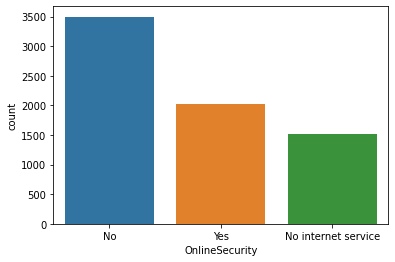

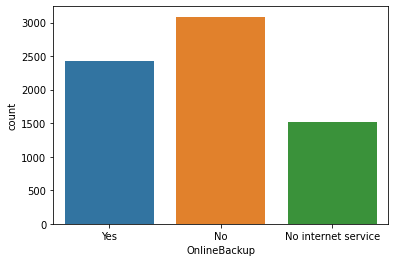

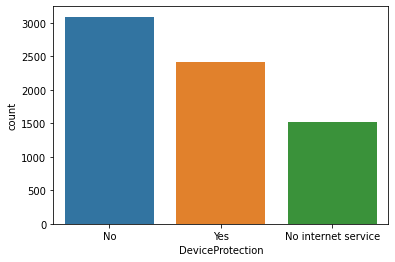

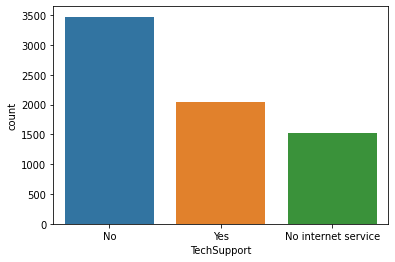

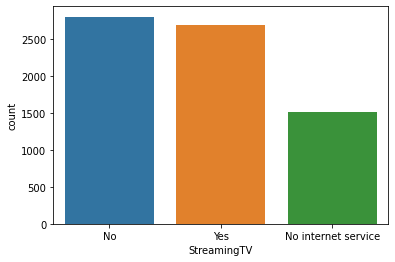

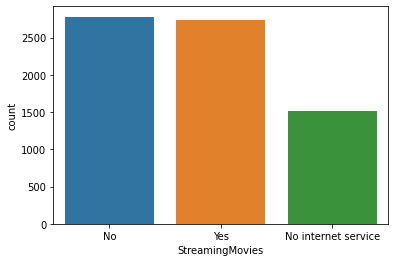

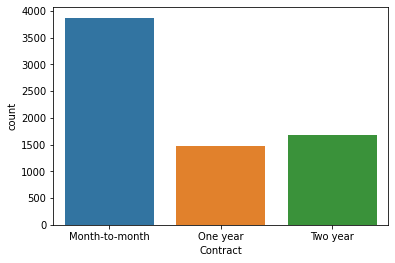

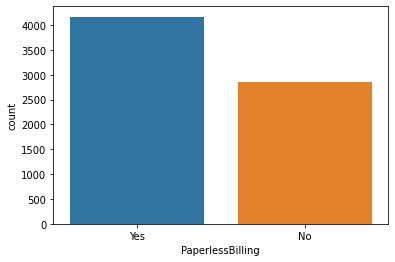

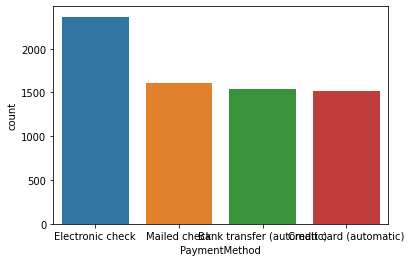

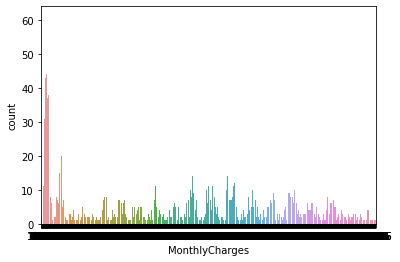

KeyboardInterrupt: ignored

In [ ]:
#creating countplots to check the unique values of features with binary and repeatitive values

plt.figure(figsize=(5,5))

sns.countplot(df['Churn'])
plt.show()
sns.countplot(df['gender'])
plt.show()
sns.countplot(df['SeniorCitizen'])
plt.show()
sns.countplot(df['Dependents'])
plt.show()
sns.countplot(df['tenure'])
plt.show()
sns.countplot(df['PhoneService'])
plt.show()
sns.countplot(df['MultipleLines'])
plt.show()
sns.countplot(df['InternetService'])
plt.show()
sns.countplot(df['OnlineSecurity'])
plt.show()
sns.countplot(df['OnlineBackup'])
plt.show()
sns.countplot(df['DeviceProtection'])
plt.show()
sns.countplot(df['TechSupport'])
plt.show()
sns.countplot(df['StreamingTV'])
plt.show()
sns.countplot(df['StreamingMovies'])
plt.show()
sns.countplot(df['Contract'])
plt.show()
sns.countplot(df['PaperlessBilling'])
plt.show()
sns.countplot(df['PaymentMethod'])
plt.show()
sns.countplot(df['MonthlyCharges'])
plt.show()
sns.countplot(df['TotalCharges'])
plt.show()

**Checking the count plots will reveal that there is high impalance in the counts of unique values for some of the features.**

#Handling Outliers

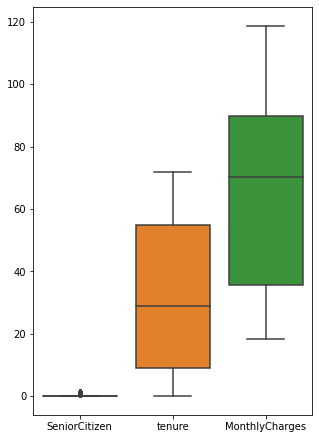

In [ ]:
#checking for outliers using boxplot . There are no outlier values in that can be found from the box plot
plt.figure(figsize = (5,7.5))
sns.boxplot(data = df)

**Data Processing**

In [ ]:
#seperating the input variables(x) and output variable(y) into 2 different datasets
dfx1 = df.drop(['Churn'],axis = 1)
dfx1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [ ]:
dfy = df[['Churn']]
dfy

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
#Dummy coding to convert categorical input variables into binary values.
dfx = pd.get_dummies(dfx1)
dfx.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.10,TotalCharges_999.45,TotalCharges_999.80,TotalCharges_999.90
0,0,1,29.85,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get the list of all column names from headers for dfx
column_headers = list(dfx.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'P

In [ ]:
#converting the output variable into binary
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dfy['Churn']  = LE.fit_transform(dfy['Churn'])
dfy

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


#Data Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
dfx_normalised = pd.DataFrame(scaling.fit_transform(dfx),columns = dfx.columns)
dfx_normalised.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.10,TotalCharges_999.45,TotalCharges_999.80,TotalCharges_999.90
0,0.0,0.013889,0.115423,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.472222,0.385075,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.027778,0.354229,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.625000,0.239303,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Feature Selection - KBest using Chi2 tests

In [ ]:
#importing the KBest and Chi2 packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(dfx_normalised,dfy)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(dfx_normalised.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

                                features     k_score
35               Contract_Month-to-month  519.895311
37                     Contract_Two year  488.578090
42        PaymentMethod_Electronic check  426.422767
17                     OnlineSecurity_No  416.182917
26                        TechSupport_No  406.117093
15           InternetService_Fiber optic  374.476216
16                    InternetService_No  286.520193
18    OnlineSecurity_No internet service  286.520193
21      OnlineBackup_No internet service  286.520193
24  DeviceProtection_No internet service  286.520193


Contract_Month-to-month            0.096600
tenure                             0.070660
Contract_Two year                  0.060100
OnlineSecurity_No                  0.057024
TechSupport_No                     0.054611
InternetService_Fiber optic        0.050197
PaymentMethod_Electronic check     0.049895
MonthlyCharges                     0.048745
TechSupport_No internet service    0.041105
StreamingTV_No internet service    0.037945
dtype: float64


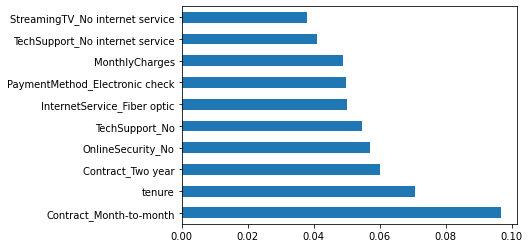

In [ ]:
#Feature Selection using Mutual Info. Classifier
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(dfx_normalised, dfy)

mutual_data = pd.Series(mutual_info, index = dfx_normalised.columns)
mutual_data.sort_values(ascending = False)

print(mutual_data.nlargest(10))

mutual_data.nlargest(10).plot(kind = 'barh')
plt.show()

**From the above 2 methods of feature selection, we can find that the significant features are 'Contract_Month-to-month', 'Contract_Two year','PaymentMethod_Electronic check','OnlineSecurity_No','TechSupport_No', 'InternetService_Fiber optic'. Hence we retain these features while dropping others**

In [ ]:
dfx_normalised = dfx_normalised[['Contract_Month-to-month','Contract_Two year','PaymentMethod_Electronic check','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic']]
dfx_normalised.head()


,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check,OnlineSecurity_No,TechSupport_No,InternetService_Fiber optic
0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,1.0


#Data Split

In [ ]:
#splitting the data into test and combined data(training + validation) in 80-20 percentage
from sklearn.model_selection import train_test_split
X_train,X_combine,Y_train,Y_combine = train_test_split(dfx_normalised,dfy,train_size=0.80, random_state=500)
X_train.shape,X_combine.shape,Y_train.shape,Y_combine.shape

((5634, 6), (1409, 6), (5634, 1), (1409, 1))

In [ ]:
#splitting the combined data into test and validation data in 50-50 percentage
X_val,X_test,Y_val,Y_test = train_test_split(X_combine,Y_combine,test_size=0.50, random_state=500)
X_val.shape,X_test.shape,Y_val.shape,Y_test.shape

((704, 6), (705, 6), (704, 1), (705, 1))

#SMOTE - Oversampling Technique to overcome imbalance in the output variable

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the SMOTE package and fitting the same for the test and train data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10)

X_train_smote, Y_train_smote = smote.fit_resample(X_train,Y_train)

In [ ]:
#checking the count of each 'label' in Y_train before SMOTE
dfy , count = np.unique(Y_train,return_counts = True)
Y_train_dict_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_dict_value_count

{0: 4138, 1: 1496}

In [ ]:
#checking the count of each 'label' in Y_train after SMOTE
df1y , count = np.unique(Y_train_smote,return_counts = True)
Y_train_smote_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_smote_value_count

{0: 4112, 1: 4112}

In [ ]:
#checking the output class values after SMORTE
sns.countplot(dfy)
plt.show()

IndexError: ignored

#Under Sampling - to reduce the number of values in the majority output class equal to the level of minority output class ( inorder to reduce imbalance)

In [ ]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_train_rus,Y_train_rus = rus.fit_resample(X_train,Y_train)

In [ ]:
#checking the count of each 'label' in Y_train after Under Sampling
df1y , count = np.unique(Y_train_rus,return_counts = True)
Y_train_rus_value_count = { k:v for (k,v) in zip(dfy , count)}
Y_train_rus_value_count

{0: 1513, 1: 1513}

#Build Model - Logistic Regression

In [ ]:
#model training on training data and predicting for test data
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(X_train,Y_train)
Y_pred = LG.predict(X_test)

**Model Evaluation - Logistic Regression**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[469  64]
 [ 78  93]]


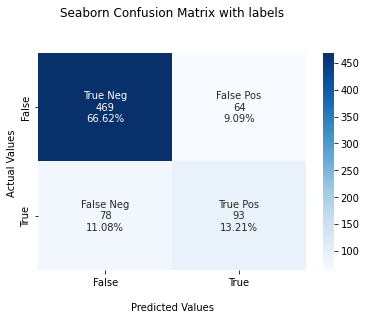

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)

accuracy score 0.7982954545454546
recall score 0.543859649122807
precision score 0.5923566878980892
f1 score 0.5670731707317073
roc_auc_score 0.7118923011092458
log_loss 6.966700883967116


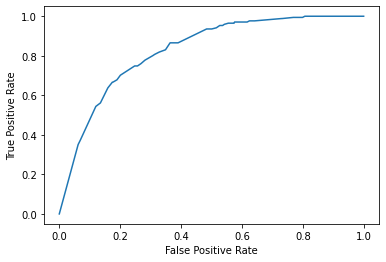

In [ ]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Oversampling method (SMOTE)

In [ ]:
LG.fit(X_train_smote,Y_train_smote)
Y_pred = LG.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[383 150]
 [ 38 133]]
accuracy score 0.7329545454545454
recall score 0.7777777777777778
precision score 0.46996466431095407
f1 score 0.5859030837004405
roc_auc_score 0.7481759432978945
log_loss 9.223593610593376


Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Undersampling method.

In [ ]:
LG.fit(X_train_rus,Y_train_rus)
Y_pred = LG.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[387 146]
 [ 40 131]]
accuracy score 0.7357954545454546
recall score 0.7660818713450293
precision score 0.4729241877256318
f1 score 0.5848214285714285
roc_auc_score 0.7460803352972801
log_loss 9.125467543576981


#Build Model - Decision Tree

In [ ]:
#model training on training data and predicting for test data
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

**Model Evaluation - Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[461  72]
 [ 73  98]]


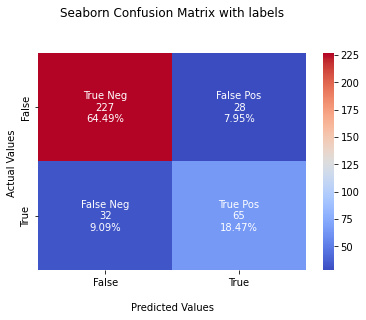

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.8295454545454546
recall score 0.6701030927835051
precision score 0.6989247311827957
f1 score 0.6842105263157894
roc_auc_score 0.7801495856074387
log_loss 5.887355035291723


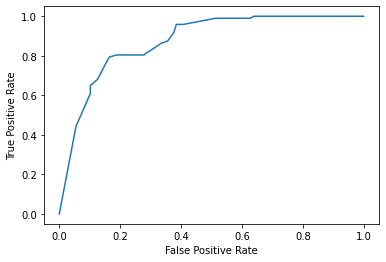

In [ ]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Oversampling method (SMOTE)

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtc.fit(X_train_smote,Y_train_smote)
Y_pred = dtc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


Checking if the evaluation parameter scores can be bettered if imbalance of output values is cancelled using Undersampling method.

In [ ]:
dtc.fit(X_train_rus,Y_train_rus)
Y_pred = dtc.predict(X_test)


#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


#Build Model - Random Forest

In [ ]:
#model training on training data and predicting for test data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, criterion = 'gini' , random_state = 0)
rfc.fit(X_train , Y_train)
Y_pred = rfc.predict(X_test)

**Model Evaluation - Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[229  26]
 [ 38  59]]


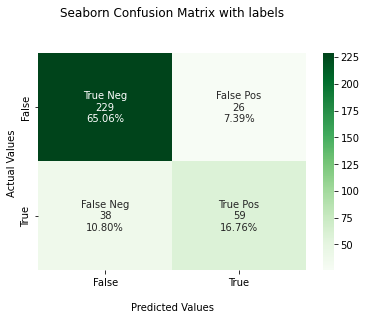

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_ls', log_ls)

accuracy score 0.8181818181818182
recall score 0.6082474226804123
precision score 0.6941176470588235
f1 score 0.6483516483516484
roc_auc_score 0.7531433191833435
log_ls 6.279836587521218


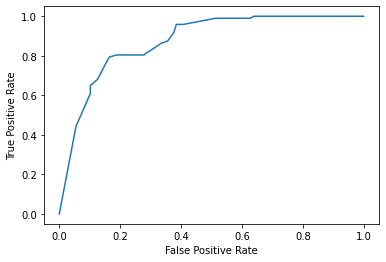

In [ ]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

OverSampling (SMOTE)

In [ ]:
rfc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
rfc.fit(X_train_smote,Y_train_smote)
Y_pred = rfc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


Under Sampling

In [ ]:
rfc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
rfc.fit(X_train_rus,Y_train_rus)
Y_pred = rfc.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)


[[380 153]
 [ 36 135]]
accuracy score 0.7315340909090909
recall score 0.7894736842105263
precision score 0.46875
f1 score 0.5882352941176471
roc_auc_score 0.7512096376024489
log_loss 9.272657779893379


#Build Model - Support Vector Classifier



In [ ]:
from sklearn.svm import SVC
svcm = SVC()
svcm.fit(X_train , Y_train)
Y_pred = svcm.predict(X_test)

**Model Evaluation - Support Vector Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[473  60]
 [ 82  89]]


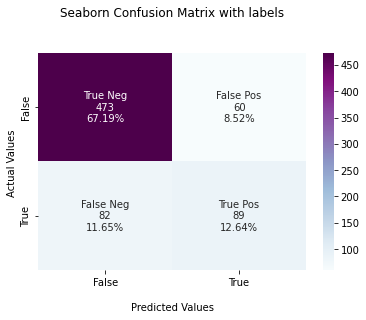

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7982954545454546
recall score 0.52046783625731
precision score 0.5973154362416108
f1 score 0.55625
roc_auc_score 0.7039487398922574
log_loss 6.966696340799899


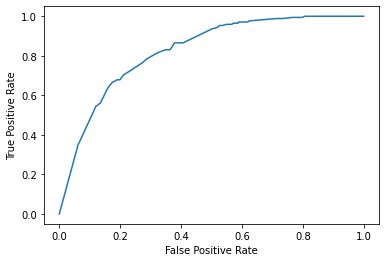

In [ ]:
#drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#getting model parametes
svcm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Grid Search - Support Vector Classifier

In [ ]:
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' :[0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [ ]:
#cross-validation
from sklearn.model_selection import GridSearchCV

In [ ]:
#an estimator like SVC and creates a new estimator that behaves exactly the same 
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 5)

In [ ]:
#fitting the grid into the training dataset
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.731 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.732 total time=   0.8s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.731 total time=   0.8s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

Inspect the best parameters found by GridSearchCV in the best_params_attribute and the best estimator in best_estimator_attribute :

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [ ]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(X_test)

In [ ]:
# rerunning the confusion matrix
print(confusion_matrix(Y_test,grid_predictions))

[[473  60]
 [ 82  89]]


In [ ]:
# recalculating the evaluation parameters
ac = accuracy_score(Y_test,grid_predictions)
print('accuracy score', ac)

rc = recall_score(Y_test,grid_predictions)
print('recall score', rc)

pc = precision_score(Y_test,grid_predictions)
print('precision score', pc)

f1sc = f1_score(Y_test,grid_predictions)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,grid_predictions)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss', log_ls)

accuracy score 0.7982954545454546
recall score 0.52046783625731
precision score 0.5973154362416108
f1 score 0.55625
roc_auc_score 0.7039487398922574
log_loss 6.966696340799899


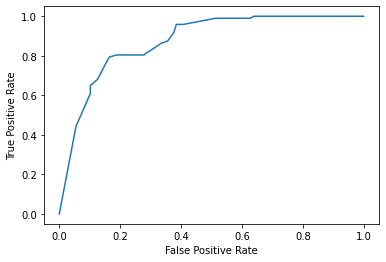

In [ ]:
#re-drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Over Sampling (SMOTE)

In [ ]:
svcm.fit(X_train_smote, Y_train_smote)
Y_pred = svcm.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)



[[392 141]
 [ 42 129]]
accuracy score 0.7400568181818182
recall score 0.7543859649122807
precision score 0.4777777777777778
f1 score 0.5850340136054423
roc_auc_score 0.7449228136006056
log_loss 8.978279578844194


Under Sampling

In [ ]:
svcm.fit(X_train_rus, Y_train_rus)
Y_pred = svcm.predict(X_test)

#print confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)



[[374 159]
 [ 35 136]]
accuracy score 0.7244318181818182
recall score 0.7953216374269005
precision score 0.4610169491525424
f1 score 0.5836909871244634
roc_auc_score 0.7485050963869962
log_loss 9.51796840426715


#Build Model - K Nearest Neighbours

In [ ]:
#model training on training data and predicting for test data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , Y_train)
Y_pred = knn.predict(X_test)

**Model Evaluation - KNeighbors Classifier**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score, roc_auc_score,log_loss

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[447  86]
 [ 65 106]]


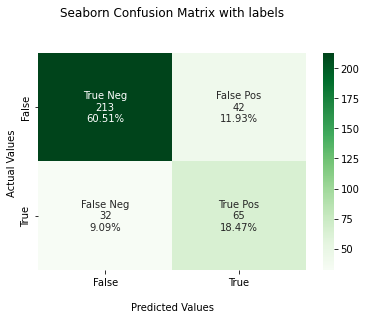

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_ls', log_ls)

accuracy score 0.7855113636363636
recall score 0.6198830409356725
precision score 0.5520833333333334
f1 score 0.5840220385674931
roc_auc_score 0.7292660983289994
log_ls 7.40827272870811


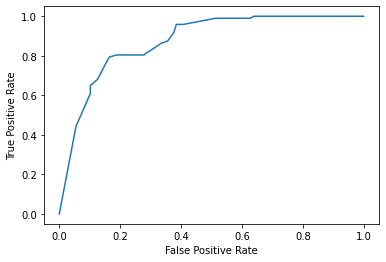

In [ ]:
#re-drawing the roc_auc curve
#define metrics
from sklearn import metrics
y_pred_proba = LG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Over Sampling (SMOTE)

In [ ]:
knn.fit(X_train_smote , Y_train_smote)
Y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)



[[416 117]
 [ 53 118]]
accuracy score 0.7585227272727273
recall score 0.6900584795321637
precision score 0.502127659574468
f1 score 0.5812807881773399
roc_auc_score 0.7352731422051063
log_loss 8.340462414821236


Under Sampling

In [ ]:
knn.fit(X_train_rus, Y_train_rus)
Y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

ac = accuracy_score(Y_test,Y_pred)
print('accuracy score', ac)

rc = recall_score(Y_test,Y_pred)
print('recall score', rc)

pc = precision_score(Y_test,Y_pred)
print('precision score', pc)

f1sc = f1_score(Y_test,Y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (Y_test,Y_pred)
print ('roc_auc_score', roc)

log_ls = log_loss(Y_test, Y_pred)
print ('log_loss',log_ls)



[[533   0]
 [171   0]]
accuracy score 0.7571022727272727
recall score 0.0
precision score 0.0
f1 score 0.0
roc_auc_score 0.5
log_loss 8.389390289104727
